In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams.update({'font.size': 15}) 

In [3]:
def get_freqs(s, thr, step=0.1):
    spikes = (s[1:-1, :] < thr) & (s[2:, :] > thr)
    return spikes.mean(axis=0) / step

$$ \frac{\partial\phi(x, t)}{\partial t} = \omega - g J \sum_{x'=0}^{2\pi}G(x - x')(\sin(\phi(x, t) - \phi(x', t) + \alpha)),$$
	Here $x \in [0, 2\pi]$ is a discrete coordinate of oscillator in the ring. The number of oscillators $N$ is equal 10. The coupling $G(x - x')$ between oscillators $x$ and $x'$ is symmetrical and defines as follows:

$$ G(x - x') = \frac{1}{2\pi} \left(1 + A\cos (x - x')\right) $$	

In [4]:
def kuramoto(phi, N, alpha, A, g, omega, J, noise=0):
    z = np.arange(N) * 2 * np.pi / N
    G = 1 + A * np.cos(z[:, None] - z[None, :])
    
    dphi = omega - g * 1 / (2 * np.pi * N) * np.sum(J * G * np.sin(phi[:, None] - phi[None, :] + alpha), 1) + noise
    
    return dphi

In [5]:
STEP = 0.1
T = 10000

phi0 = np.random.randn(N) * 2 * np.pi

In [6]:
# Topology of star with tale

# N = 10
# J = np.zeros((N, N))

# for i in range(1, N - 3):
#     J[i, 0] = 1
#     J[0, i] = 1

# J[1, N - 3] = 1
# J[N - 3, 1] = 1

# J[N - 3, N - 2] = 1
# J[N - 2, N - 3] = 1

# J[N - 2, N - 1] = 1
# J[N - 1, N - 2] = 1

# G = nx.from_numpy_array(J)
# nx.draw(G, with_labels=True)

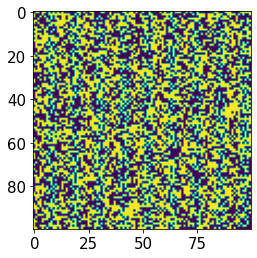

In [7]:
# G = nx.cycle_graph(N)
N = 100
G = nx.erdos_renyi_graph(N, 0.5)

J = np.array(nx.adjacency_matrix(G).todense())

plt.figure()
plt.imshow(J)
plt.show()

In [8]:
A = 0.2
g = 10
omega = 0
alpha = np.pi / 2 - 0.1

args = (N, alpha, A, g, omega, J)

In [9]:
phi = [phi0]

for t in np.arange(0, T, STEP):
    
    dphi = kuramoto(phi[-1], *args)
    phi.append(phi[-1] + dphi * STEP)
    
phi = np.array(phi) 

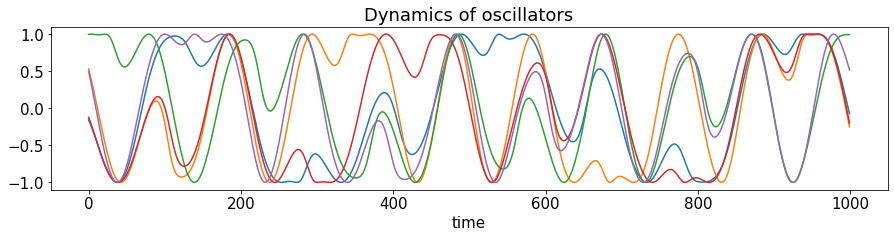

In [10]:
phi2plot = np.sin(phi)[-10000:, :]

plt.figure(figsize=(15, 3))
plt.plot(phi2plot[-1000:, :5])
plt.xlabel('time')
plt.title('Dynamics of oscillators')
plt.show()

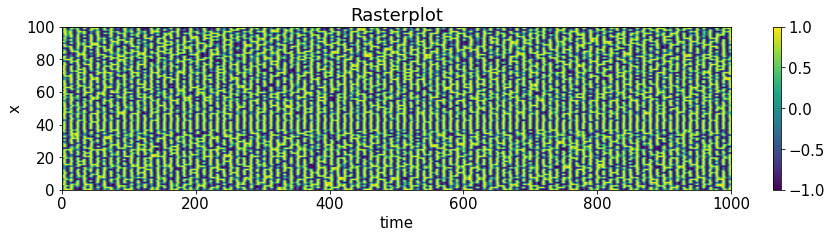

In [11]:
plt.figure(figsize=(15, 3))
plt.imshow(phi2plot[:, :].T, aspect='auto',
           extent=[0, phi2plot.shape[0] * STEP, 0, phi2plot.shape[1]]
          )          
plt.ylabel('x')
plt.xlabel("time")
plt.title('Rasterplot')
plt.colorbar()
plt.show()

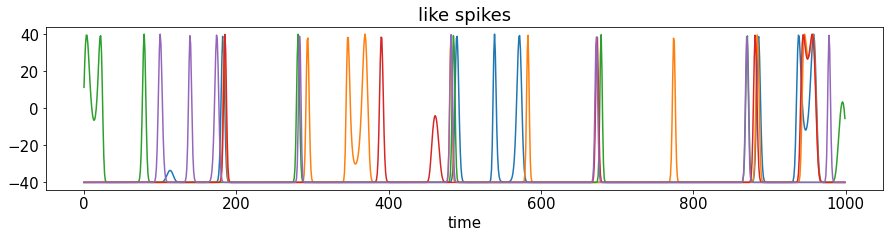

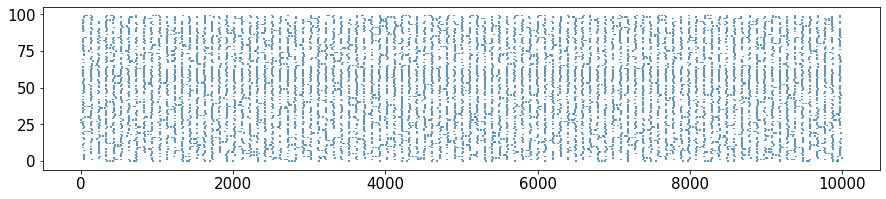

In [12]:
s = np.exp(100 * np.sin(phi)) 
s = s / np.max(s) * 80 - 40

plt.figure(figsize=(15, 3))
plt.plot(s[-1000:, :5])
plt.xlabel('time')
plt.title('like spikes')
plt.show()

thr = 0
spikes = (s[1:-1, :] < thr) & (s[2:, :] > thr)

events = [np.where(s)[0] for s in spikes[-10000:, :].T]

plt.figure(figsize=(15, 3))
plt.eventplot(events)
plt.show()

freqs = [0.04008016 0.07014028 0.07014028 0.07014028 0.07014028 0.08016032
 0.08016032 0.0501002  0.07014028 0.07014028 0.09018036 0.0501002
 0.07014028 0.1002004  0.0501002  0.08016032 0.0501002  0.04008016
 0.07014028 0.06012024 0.09018036 0.04008016 0.1002004  0.09018036
 0.09018036 0.1002004  0.08016032 0.09018036 0.04008016 0.1002004
 0.06012024 0.09018036 0.0501002  0.1002004  0.1002004  0.06012024
 0.1002004  0.07014028 0.08016032 0.08016032 0.06012024 0.07014028
 0.1002004  0.0501002  0.07014028 0.06012024 0.1002004  0.09018036
 0.07014028 0.09018036 0.07014028 0.1002004  0.0501002  0.07014028
 0.1002004  0.1002004  0.09018036 0.09018036 0.1002004  0.1002004
 0.1002004  0.1002004  0.1002004  0.08016032 0.09018036 0.08016032
 0.0501002  0.06012024 0.06012024 0.1002004  0.09018036 0.08016032
 0.08016032 0.08016032 0.06012024 0.04008016 0.1002004  0.08016032
 0.1002004  0.0501002  0.07014028 0.1002004  0.09018036 0.1002004
 0.08016032 0.07014028 0.07014028 0.07014028 0.1002004  0.

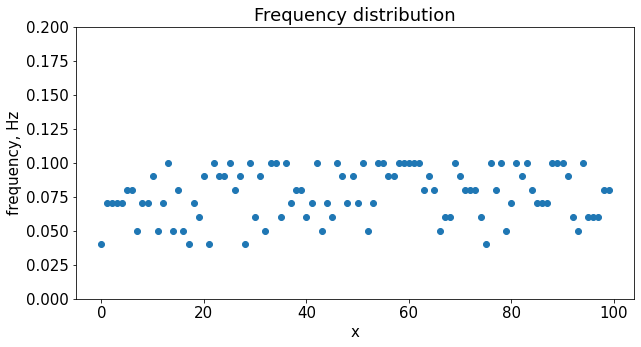

In [13]:
signal = np.sin(phi[-1000:])
freqs = get_freqs(signal, 0.5, STEP)

print(f'freqs = {freqs}')

plt.figure(figsize=(10, 5))
plt.scatter(np.arange(N), freqs)
plt.xlabel('x')
plt.ylabel('frequency, Hz')
plt.title('Frequency distribution')
plt.ylim(0, 0.2)
plt.show()

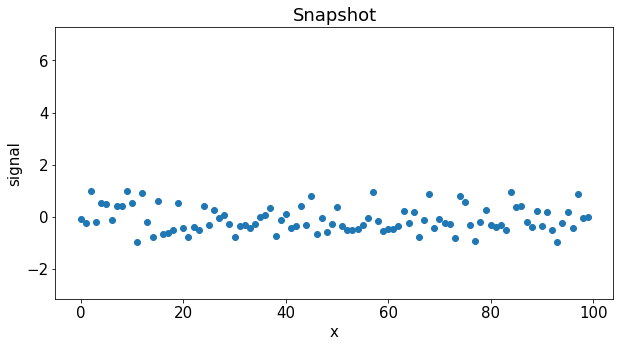

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(np.arange(N), phi2plot[-1, :])
plt.xlabel('x')
plt.ylabel('signal')
plt.title('Snapshot')
plt.ylim(-np.pi, np.pi * 2 + 1)
plt.show()

### Order parameter:

$$ r =  |\frac{1}{N} \sum_{i}^N e^{i\phi_i}| $$

In [15]:
def order_parameter(phi, N):
    r = np.abs(1 / N * np.sum(np.exp(1j * phi), axis=1))
    return r

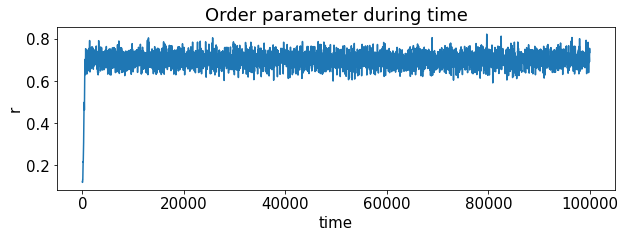

Order parameter is 0.7012084519229395


In [16]:
r = order_parameter(phi, N)

plt.figure(figsize=(10, 3))
plt.plot(r)
plt.title('Order parameter during time')
plt.xlabel('time')
plt.ylabel('r')
plt.show()

print(f'Order parameter is {np.sum(r) / len(r)}')